# Part 4

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns
import PandaSurvey
import weightedcalcs as wc

In [2]:
df = pd.read_csv('/Users/Ariel/Desktop/usa_00005.csv')

In [3]:
df["INCTOT"].replace({9999999: np.nan}, inplace=True) #removing coded variable for no income information

In [4]:
df1 = df[df['INCTOT'].notna()]

In [5]:
df1['ADJINC'] = df1['INCTOT']*df1['CPI99']

<ipython-input-5-d7bcb78dde73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ADJINC'] = df1['INCTOT']*df1['CPI99']


In [6]:
df1

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,CPI99,STATEICP,COUNTYICP,PUMA,...,CITIZEN,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY,ADJINC
0,2009,200901,816419,89,150.0,2009008164191,0.777,13,810,4101,...,2,5,2,1,2,1,10,3800.0,33,2952.6
1,2009,200901,816419,89,150.0,2009008164191,0.777,13,810,4101,...,3,2,1,1,1,1,10,30000.0,267,23310.0
2,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,4015,...,3,2,1,1,2,1,10,15000.0,93,11655.0
3,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,4015,...,3,1,1,1,1,1,10,1000.0,93,777.0
4,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,4015,...,3,2,1,1,2,3,30,0.0,93,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768349,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,470,4003,...,0,0,1,1,2,3,30,0.0,53,0.0
768353,2019,201901,923331,2019001412438,94.0,2019009233311,0.652,13,50,3706,...,3,5,2,1,1,3,30,15500.0,54,10106.0
768354,2019,201901,923331,2019001412438,94.0,2019009233311,0.652,13,50,3706,...,0,0,1,1,2,1,10,1400.0,54,912.8
768355,2019,201901,923331,2019001412438,94.0,2019009233311,0.652,13,50,3706,...,0,0,1,1,1,3,30,0.0,54,0.0


In [13]:
weighted = df1.groupby(['YEAR'], as_index=False).sum('PERWT')

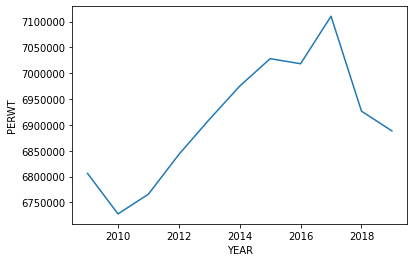

In [19]:
sns.lineplot(x='YEAR', y='PERWT', 
             data=weighted)
plt.ticklabel_format(style='plain')

In [11]:
df1.to_csv('usa_00005adj.csv')

In [7]:
model = sm.OLS(df1['ADJINC'].dropna(), df1['HINSCAID'].dropna()).fit()
predictions = model.predict(df1['HINSCAID']) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                 ADJINC   R-squared (uncentered):                   0.161
Model:                            OLS   Adj. R-squared (uncentered):              0.161
Method:                 Least Squares   F-statistic:                          1.232e+05
Date:                Fri, 09 Jul 2021   Prob (F-statistic):                        0.00
Time:                        15:36:34   Log-Likelihood:                     -7.8986e+06
No. Observations:              642075   AIC:                                  1.580e+07
Df Residuals:                  642074   BIC:                                  1.580e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:
X = df1["HINSCAID"]
y = df1["ADJINC"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 ADJINC   R-squared (uncentered):                   0.161
Model:                            OLS   Adj. R-squared (uncentered):              0.161
Method:                 Least Squares   F-statistic:                          1.232e+05
Date:                Fri, 09 Jul 2021   Prob (F-statistic):                        0.00
Time:                        15:42:00   Log-Likelihood:                     -7.8986e+06
No. Observations:              642075   AIC:                                  1.580e+07
Df Residuals:                  642074   BIC:                                  1.580e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HINSCAID    1.733e+04     49.370    351.065      0.000    1.72e+04    1.74e+04
==============================================================================
Omnibus:                   655205.000   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45442356.628
Skew:                           5.088   Prob(JB):                         0.00
Kurtosis:                      42.938   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
X = df1["HINSCAID"] ## X usually means our input variables (or independent variables)
y = df1["ADJINC"] ## Y usually means our output/dependent variable
df1 = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 ADJINC   R-squared (uncentered):                   0.161
Model:                            OLS   Adj. R-squared (uncentered):              0.161
Method:                 Least Squares   F-statistic:                          1.232e+05
Date:                Fri, 09 Jul 2021   Prob (F-statistic):                        0.00
Time:                        15:43:49   Log-Likelihood:                     -7.8986e+06
No. Observations:              642075   AIC:                                  1.580e+07
Df Residuals:                  642074   BIC:                                  1.580e+07
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HINSCAID    1.733e+04     49.370    351.065      0.000    1.72e+04    1.74e+04
==============================================================================
Omnibus:                   655205.000   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45442356.628
Skew:                           5.088   Prob(JB):                         0.00
Kurtosis:                      42.938   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='YEAR', ylabel='ADJINC'>

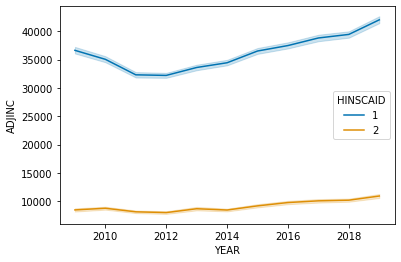

In [12]:
sns.lineplot(x='YEAR', y='ADJINC', hue='HINSCAID', 
             data=df1,  palette=sns.color_palette("colorblind", n_colors=2))